In [2]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

def getImage(image):
    path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 3/'
    im = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    return im

<ipython-input-27-b2d1947d1d22>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(F)), dtype=np.uint8)


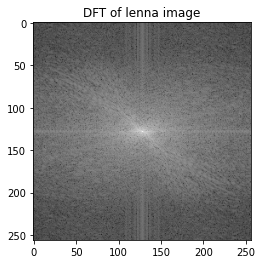

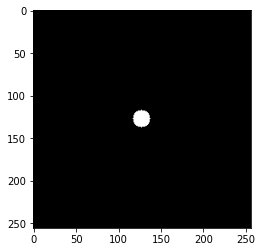

<ipython-input-27-b2d1947d1d22>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  s = np.array(cc*np.log(1 + np.abs(G1)), dtype=np.uint8)


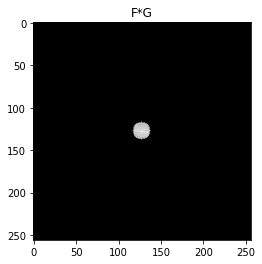

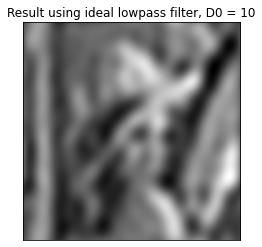

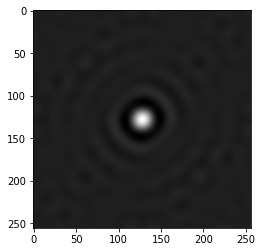

In [27]:
# QUESTION 1
imsQ1 = ['lenna256.jpg', 'ilpf.bmp', 'ihpf.bmp', 'blpf.bmp', 'bhpf.bmp']
lenna = getImage('lenna256.jpg')
I_low = getImage('ilpf.bmp')
I_high = getImage('ihpf.bmp')
B_low = getImage('blpf.bmp')
B_high = getImage('bhpf.bmp')

r, c = lenna.shape
# compute DFT
F = np.fft.fftshift(np.fft.fft2(lenna))
# display purposes
Y = np.log(1 + F)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(F)), dtype=np.uint8)
plt.imshow(spectrum, cmap="gray")
plt.title("DFT of lenna image")
plt.show()
# a : Ideal
# LOW PASS
plt.imshow(I_low, cmap="gray")
plt.show()

# form product elementwise
G1 = np.multiply(I_low, F)
# display purposes
Y = np.log(1 + G1)
cc = 255/np.max(Y)
s = np.array(cc*np.log(1 + np.abs(G1)), dtype=np.uint8)
plt.imshow(s, cmap="gray")
plt.title("F*G")
plt.show()
g1 = np.real(np.fft.ifft2(np.fft.fftshift(G1)))
# display image
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.imshow(g1, cmap="gray")
plt.title("Result using ideal lowpass filter, D0 = 10")
plt.show()
# show profile of spatial kernel
I_low_s = np.fft.fftshift(np.real(np.fft.ifft2(np.fft.fftshift(I_low))))
plt.imshow(I_low_s, cmap="gray")
plt.show()

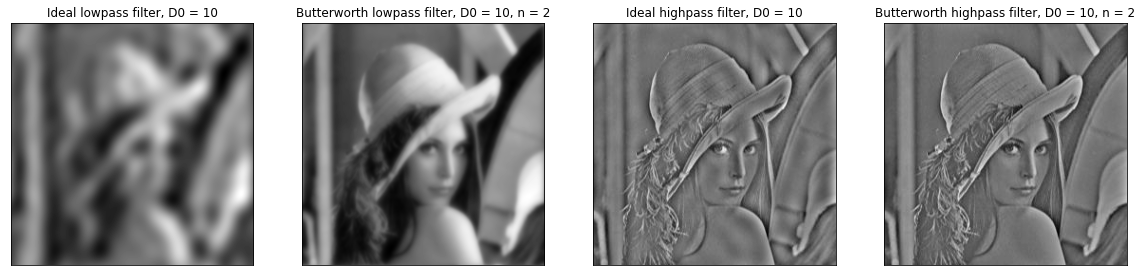

In [28]:
G2 = np.multiply(I_high, F)
g2 = np.real(np.fft.ifft2(np.fft.fftshift(G2)))

# b : Butterworth
G3 = np.multiply(B_low, F)
g3 = np.real(np.fft.ifft2(np.fft.fftshift(G3)))
G4 = np.multiply(B_high, F)
g4 = np.real(np.fft.ifft2(np.fft.fftshift(G4)))

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Ideal lowpass filter, D0 = 10")
ax[0].imshow(g1, cmap="gray")
ax[1].set_title("Butterworth lowpass filter, D0 = 10, n = 2")
ax[1].imshow(g3, cmap="gray")
ax[2].set_title("Ideal highpass filter, D0 = 10")
ax[2].imshow(g2, cmap="gray")
ax[3].set_title("Butterworth highpass filter, D0 = 10, n = 2")
ax[3].imshow(g4, cmap="gray")



In [29]:
# c
# create filter functions
# use D0 = 30, 60, 150
D0 = 30
n = 2
H_il = np.zeros((r, c))
H_ih = np.zeros((r, c))
H_bl = np.zeros((r, c))
H_bh = np.zeros((r, c))
# construct lowpass filters
for u in range(r):
    for v in range(c):
        D = np.sqrt((u - r/2)**2 + (v - r/2)**2)
        H_bl[u][v] = 1/(1 + (D/D0)**(2*n))
        if D <= D0:
            H_il[u][v] = 1
        elif D > 0 :
            H_il[u][v] = 0
# obtain highpass filters
H_ih = 1 - H_il
H_bh = 1 - H_bl

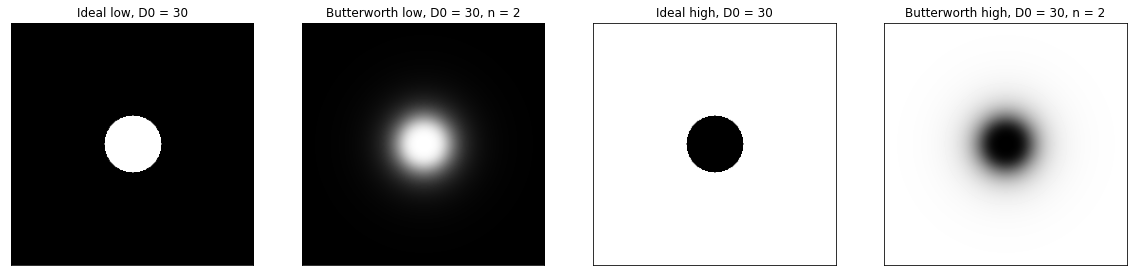

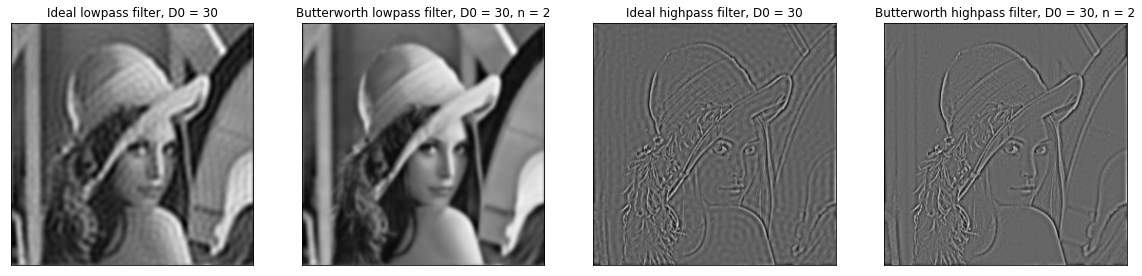

In [30]:
# c
# plot filters
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Ideal low, D0 = 30')
ax[0].imshow(H_il, cmap="gray")
ax[1].set_title('Butterworth low, D0 = 30, n = 2')
ax[1].imshow(H_bl, cmap="gray")
ax[2].set_title('Ideal high, D0 = 30')
ax[2].imshow(H_ih, cmap="gray")
ax[3].set_title('Butterworth high, D0 = 30, n = 2')
ax[3].imshow(H_bh, cmap="gray")

K1 = np.multiply(H_il, F)
k1 = np.real(np.fft.ifft2(np.fft.fftshift(K1)))
K2 = np.multiply(H_bl, F)
k2 = np.real(np.fft.ifft2(np.fft.fftshift(K2)))
K3 = np.multiply(H_ih, F)
k3 = np.real(np.fft.ifft2(np.fft.fftshift(K3)))
K4 = np.multiply(H_bh, F)
k4 = np.real(np.fft.ifft2(np.fft.fftshift(K4)))

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Ideal lowpass filter, D0 = 30")
ax[0].imshow(k1[0:r, 0:c], cmap="gray")
ax[1].set_title("Butterworth lowpass filter, D0 = 30, n = 2")
ax[1].imshow(k2[0:r, 0:c], cmap="gray")
ax[2].set_title("Ideal highpass filter, D0 = 30")
ax[2].imshow(k3[0:r, 0:c], cmap="gray")
ax[3].set_title("Butterworth highpass filter, D0 = 30, n = 2")
ax[3].imshow(k4[0:r, 0:c], cmap="gray")

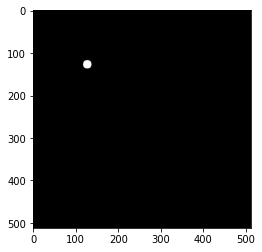

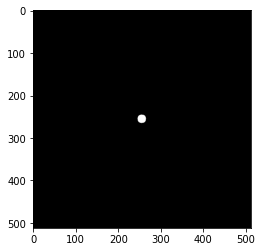

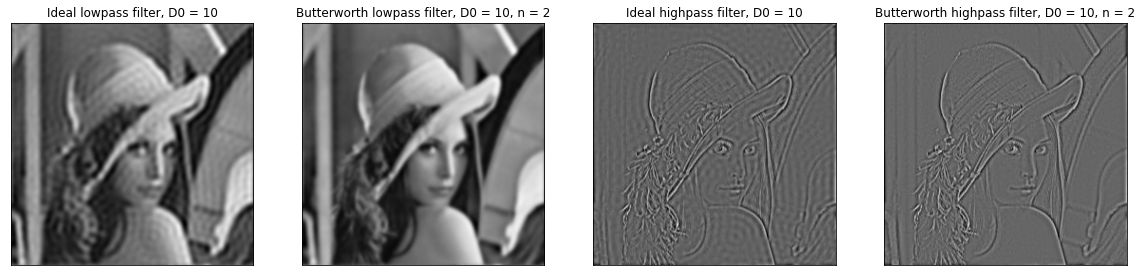

In [37]:
# d
P, Q = 2*r, 2*c
# zero pad image and filters
lenna_pad = cv2.copyMakeBorder(lenna, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
ilp_pad = cv2.copyMakeBorder(I_low, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
ihp_pad = cv2.copyMakeBorder(I_high, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
blp_pad = cv2.copyMakeBorder(B_low, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
bhp_pad = cv2.copyMakeBorder(B_high, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
ilp_pad = np.pad(I_low, int(r/2), 'constant')
ihp_pad = np.pad(I_high, int(r/2), 'constant')
blp_pad = np.pad(B_low, int(r/2), 'constant')
bhp_pad = np.pad(B_high, int(r/2), 'constant')

plt.imshow(ilp_pad, cmap="gray")
plt.show()
plt.imshow(padd, cmap="gray")
plt.show()

F_pad = np.fft.fftshift(np.fft.fft2(lenna_pad))

H1 = np.multiply(ilp_pad, F_pad)
h1 = np.real(np.fft.ifft2(np.fft.fftshift(K1)))
H2 = np.multiply(blp_pad, F_pad)
h2 = np.real(np.fft.ifft2(np.fft.fftshift(K2)))
H3 = np.multiply(ihp_pad, F_pad)
h3 = np.real(np.fft.ifft2(np.fft.fftshift(K3)))
H4 = np.multiply(bhp_pad, F_pad)
h4 = np.real(np.fft.ifft2(np.fft.fftshift(K4)))

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Ideal lowpass filter, D0 = 10")
ax[0].imshow(h1[0:r, 0:c], cmap="gray")
ax[1].set_title("Butterworth lowpass filter, D0 = 10, n = 2")
ax[1].imshow(h2[0:r, 0:c], cmap="gray")
ax[2].set_title("Ideal highpass filter, D0 = 10")
ax[2].imshow(h3[0:r, 0:c], cmap="gray")
ax[3].set_title("Butterworth highpass filter, D0 = 10, n = 2")
ax[3].imshow(h4[0:r, 0:c], cmap="gray")

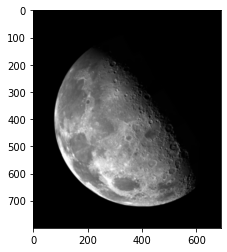

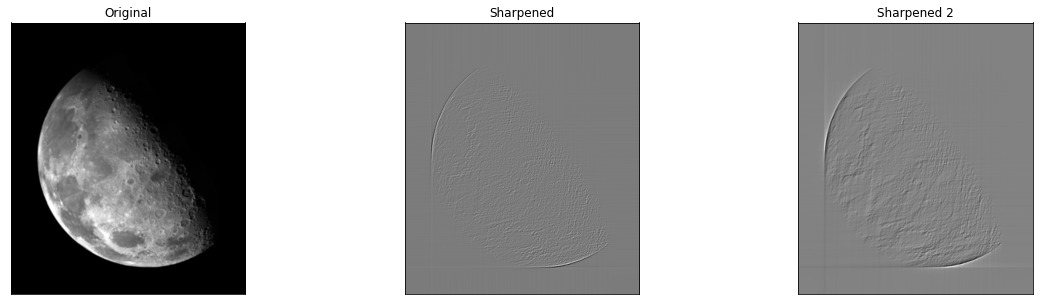

In [70]:
# QUESTION 2
moon = getImage('blurry_moon.tif')
r, c = moon.shape
# zero pad image ???????
P, Q = 2*r, 2*c
im = cv2.copyMakeBorder(moon, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
F = np.fft.fftshift(np.fft.fft2(im))

# normalise f
n_im = (im - np.min(im)) / (np.max(im) - np.min(im))
F2 = np.fft.fftshift(np.fft.fft2(n_im))

D = np.zeros((P, Q))
H = np.zeros((P, Q))
for u in range(r):
    for v in range(c):
        D[u][v] = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
        H[u][v] = - 4*(math.pi**2)*(np.sqrt((u - P/2)**2 + (v - Q/2)**2))
d = 1 + np.power(D, 2)

G = np.multiply(d, F)
g = np.real(np.fft.ifft2(np.fft.fftshift(G)))
final = g[0:r, 0:c]

Ll = np.multiply(H, F)
l = F - Ll
lap = np.real(np.fft.ifft2(np.fft.fftshift(l)))
f_lap = lap[0:r, 0:c]
final2 = moon - f_lap

# normalise
lap2 = np.real(np.fft.ifft2(np.fft.fftshift(Ll))/np.max(Ll))
fff = lap2[0:r, 0:c]
ffinal = moon - fff
plt.imshow(ffinal, cmap="gray")
plt.show()

fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(moon, cmap="gray")
ax[1].set_title('Sharpened')
ax[1].imshow(final, cmap="gray")
ax[2].set_title('Sharpened 2')
ax[2].imshow(final2, cmap="gray")

<ipython-input-129-f132692ae7a5>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)
<ipython-input-129-f132692ae7a5>:28: RuntimeWarning: divide by zero encountered in double_scalars
  H[u][v] = H[u][v] * (1/(1 + (D0k/Dk)**n))*(1/(1 + (D0k/D_k)**n))
<ipython-input-129-f132692ae7a5>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)


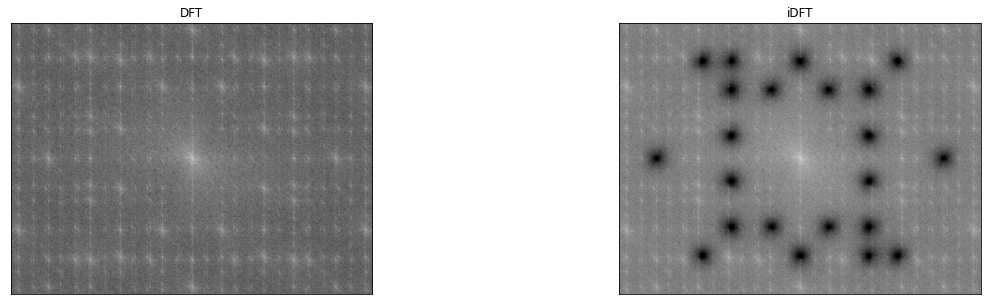

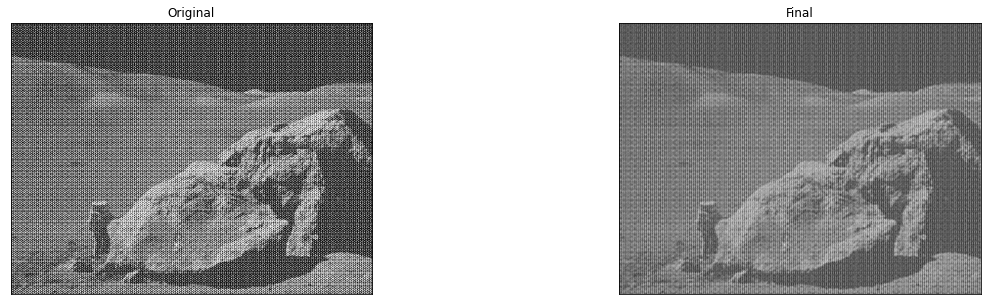

In [129]:
# QUESTION 5
imsQ5 = ['moon_walk.jpg', 'florida.jpg', 'head_ct.tif']
moonwalk = getImage(imsQ5[0])
florida = getImage(imsQ5[1])
ct = getImage(imsQ5[2])

f = np.fft.fftshift(np.fft.fft2(moonwalk))
# display purposes
Y = np.log(1 + f)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)

# 630 x 474 => 315, 237
r, c = moonwalk.shape
H = np.ones((r, c))
D0k = 30
n = 5
# centres of highpass filters
uks = [120, 120, 40, 40, 0, 120, 120, 170, 170, 170, 170]
vks = [50, -50, 120, -120, 250, 120, -120, 170, 120, -170, 0]
for i in range(len(uks)):
    for u in range(r):
        for v in range(c):
            uk = uks[i]
            vk = vks[i]
            Dk = np.sqrt((u - r/2 - uk)**2 + (v - c/2 - vk)**2)
            D_k = np.sqrt((u - r/2 + uk)**2 + (v - c/2 + vk)**2)
            H[u][v] = H[u][v] * (1/(1 + (D0k/Dk)**n))*(1/(1 + (D0k/D_k)**n))
# plt.imshow(H, cmap="gray")
# plt.show()
filter = np.multiply(H, f)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
# display purposes
Yy = np.log(1 + filter)
ccc = 255/np.max(Yy)
filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('DFT')
ax[0].imshow(spectrum, cmap="gray")
ax[1].set_title('iDFT')
ax[1].imshow(filtered, cmap="gray")

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(moonwalk, cmap="gray")
ax[1].set_title('Final')
ax[1].imshow(final, cmap="gray")

<ipython-input-151-2e191db23ca4>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)


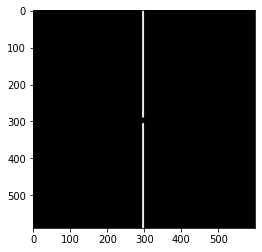

<ipython-input-151-2e191db23ca4>:14: RuntimeWarning: invalid value encountered in log
  y = np.log(1 + sp)


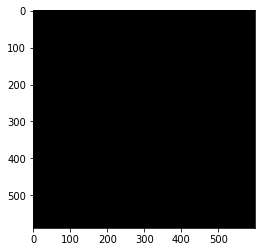

<ipython-input-151-2e191db23ca4>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)


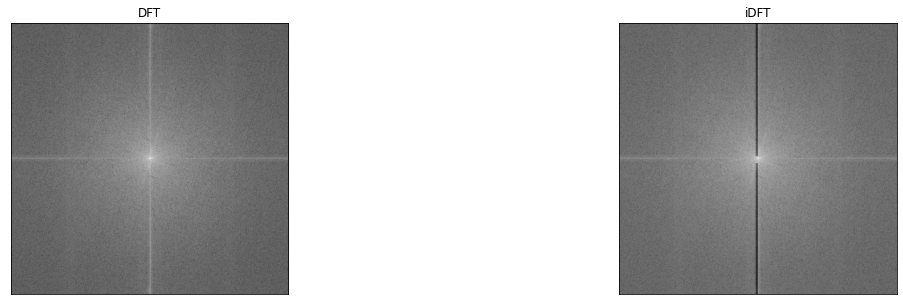

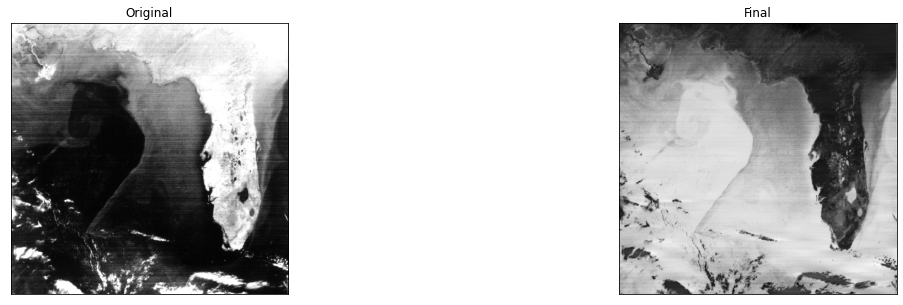

In [151]:
f = np.fft.fftshift(np.fft.fft2(florida))
# display purposes
Y = np.log(1 + f)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)
r, c = florida.shape
H = np.zeros((r, c)) + 255
H[0:290, 295:300] = 0
H[305:r, 295:300] = 0
plt.imshow(1-H, cmap="gray")
plt.show()
sp = np.real(np.fft.ifft2(np.fft.fftshift(1-H)))
# display purposes
y = np.log(1 + sp)
C = 255/np.max(y)
sss = np.array(C*np.log(1 + np.abs(sp)), dtype=np.uint8)
plt.imshow(sss, cmap="gray")
plt.show()

filter = np.multiply((1-H), f)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
# display purposes
Yy = np.log(1 + filter)
ccc = 255/np.max(Yy)
filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('DFT')
ax[0].imshow(spectrum, cmap="gray")
ax[1].set_title('iDFT')
ax[1].imshow(filtered, cmap="gray")

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(florida, cmap="gray")
ax[1].set_title('Final')
ax[1].imshow(final, cmap="gray")

<ipython-input-155-177a19071056>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)
<ipython-input-155-177a19071056>:21: RuntimeWarning: divide by zero encountered in double_scalars
  H[u][v] = H[u][v] * (1/(1 + (D0k/Dk)**n))*(1/(1 + (D0k/D_k)**n))
<ipython-input-155-177a19071056>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)


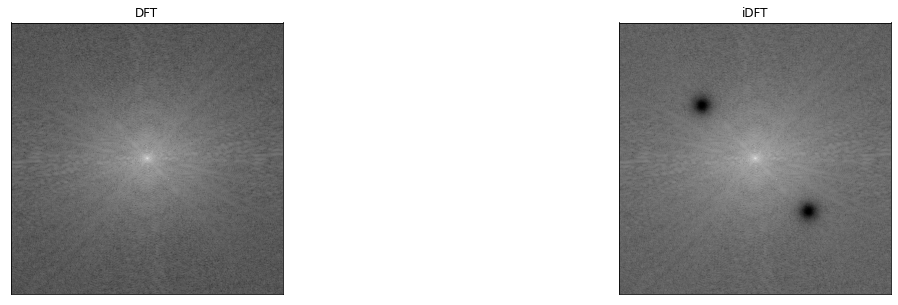

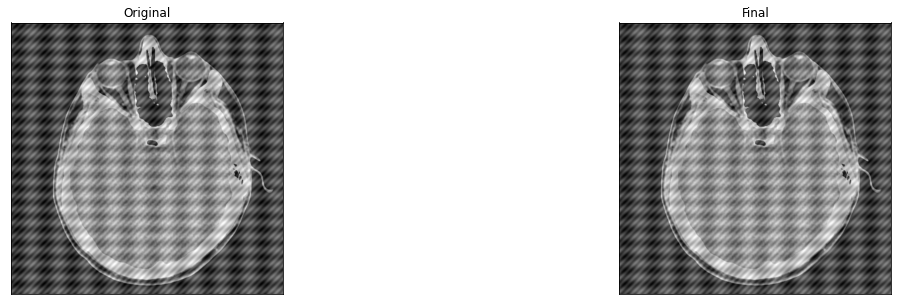

In [155]:
f = np.fft.fftshift(np.fft.fft2(ct))
# display purposes
Y = np.log(1 + f)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)

r, c = ct.shape
H = np.ones((r, c))
D0k = 30
n = 5
# centres of highpass filters
uks = [100]
vks = [100]
for i in range(len(uks)):
    for u in range(r):
        for v in range(c):
            uk = uks[i]
            vk = vks[i]
            Dk = np.sqrt((u - r/2 - uk)**2 + (v - c/2 - vk)**2)
            D_k = np.sqrt((u - r/2 + uk)**2 + (v - c/2 + vk)**2)
            H[u][v] = H[u][v] * (1/(1 + (D0k/Dk)**n))*(1/(1 + (D0k/D_k)**n))
# plt.imshow(H, cmap="gray")
# plt.show()
filter = np.multiply(H, f)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
# display purposes
Yy = np.log(1 + filter)
ccc = 255/np.max(Yy)
filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('DFT')
ax[0].imshow(spectrum, cmap="gray")
ax[1].set_title('iDFT')
ax[1].imshow(filtered, cmap="gray")

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(ct, cmap="gray")
ax[1].set_title('Final')
ax[1].imshow(final, cmap="gray")